# Travelling Salesman Problem (TSP)

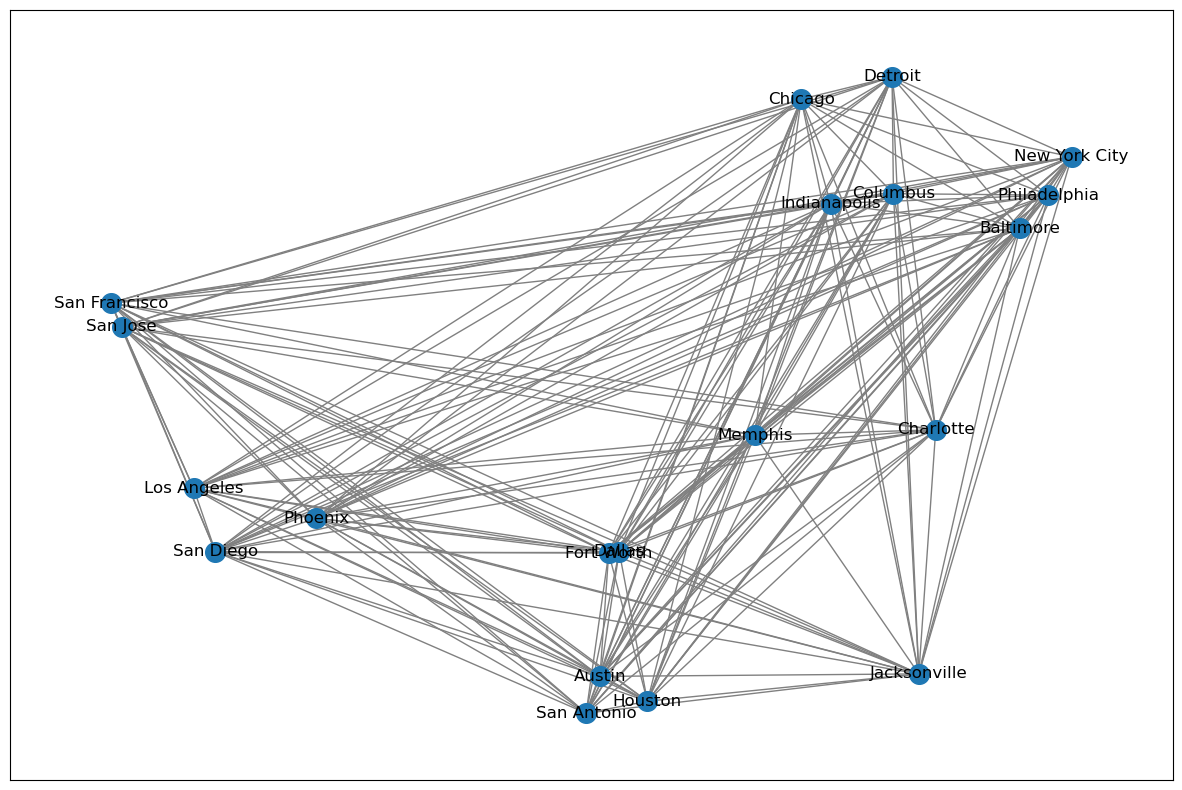

In [1]:
# Define the TSP problem
import pandas as pd
import networkx as nx
from collections import defaultdict
from haversine import haversine
import matplotlib.pyplot as plt

# latitude and longitude for the twenty largest U.S. cities
cities = {
    'New York City': (40.72, -74.00),
    'Los Angeles': (34.05, -118.25),
    'Chicago': (41.88, -87.63),
    'Houston': (29.77, -95.38),
    'Phoenix': (33.45, -112.07),
    'Philadelphia': (39.95, -75.17),
    'San Antonio': (29.53, -98.47),
    'Dallas': (32.78, -96.80),
    'San Diego': (32.78, -117.15),
    'San Jose': (37.30, -121.87),
    'Detroit': (42.33, -83.05),
    'San Francisco': (37.78, -122.42),
    'Jacksonville': (30.32, -81.70),
    'Indianapolis': (39.78, -86.15),
    'Austin': (30.27, -97.77),
    'Columbus': (39.98, -82.98),
    'Fort Worth': (32.75, -97.33),
    'Charlotte': (35.23, -80.85),
    'Memphis': (35.12, -89.97),
    'Baltimore': (39.28, -76.62)
}


# create a haversine distance matrix based on latitude-longitude coordinates
distance_matrix = defaultdict(dict)
for ka, va in cities.items():
    for kb, vb in cities.items():
        distance_matrix[ka][kb] = 0.0 if kb == ka else haversine((va[0], va[1]), (vb[0], vb[1])) 
        

# convert distance diccionary into a dataframe        
distances = pd.DataFrame(distance_matrix)
city_names=list(distances.columns)
distances=distances.values

# Visualize the cities and then route

# Create a graph
G=nx.Graph()

for ka, va in cities.items():
    for kb, vb in cities.items():
        G.add_weighted_edges_from({(ka,kb, distance_matrix[ka][kb])})
        G.remove_edges_from(nx.selfloop_edges(G))
        
fig, ax = plt.subplots(figsize=(15,10))

# reverse lat and long for correct visualization
reversed_dict = {key: value[::-1] for key, value in cities.items()}

# Create an independent shallow copy of the graph and attributes
H = G.copy()

 
# Draw the network
ax=nx.draw_networkx(
    H,
    pos=reversed_dict,
    with_labels=True,
    edge_color="gray",
    node_size=200,
    width=1,
)

plt.show()

# Solving TSP using simanneal

In [2]:
# !pip install simanneal 
# Example from simanneal Python module
import math
import random
from simanneal import Annealer

class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e
    
# initial state, a randomly-ordered itinerary
init_state = list(cities)
random.shuffle(init_state)

tsp = TravellingSalesmanProblem(init_state, distance_matrix)
tsp.set_schedule(tsp.auto(minutes=0.2))
# since our state is just a list, slice is the fastest way to copy
tsp.copy_strategy = "slice"
state, e = tsp.anneal()

while state[0] != 'New York City':
    state = state[1:] + state[:1]  # rotate NYC to start

print()
print("%i mile route:" % e)
print(" ➞  ".join(state))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     7.30000      11291.85     4.50%     0.00%     0:00:05    -1:59:59 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     7.30000      11005.17     4.67%     0.07%     0:00:06     0:00:00


11005 mile route:
New York City ➞  Columbus ➞  Detroit ➞  Chicago ➞  Indianapolis ➞  Memphis ➞  Dallas ➞  Fort Worth ➞  San Francisco ➞  San Jose ➞  Los Angeles ➞  San Diego ➞  Phoenix ➞  San Antonio ➞  Austin ➞  Houston ➞  Jacksonville ➞  Charlotte ➞  Baltimore ➞  Philadelphia


# Visualize the cities and the route

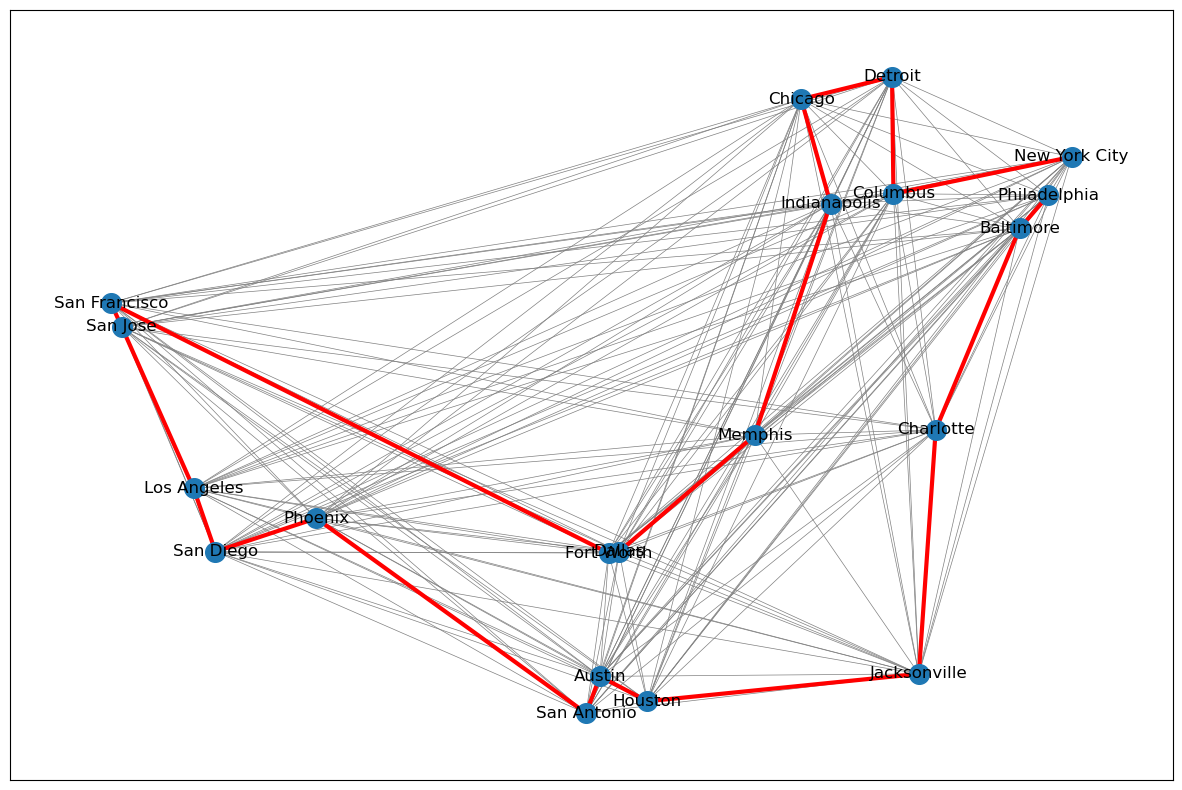

In [3]:
fig, ax = plt.subplots(figsize=(15,10))

# reverse lat and long for correct visualization
reversed_dict = {key: value[::-1] for key, value in cities.items()}

# Create an independent shallow copy of the graph and attributes
H = G.copy()

edge_list = list(nx.utils.pairwise(state))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos=reversed_dict, edge_color="gray", width=0.5)

# Draw the route
ax=nx.draw_networkx(
    H,
    pos=reversed_dict,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

plt.show()